# Project 2: Building a Color Magnitude Diagram of Open and Globular Clusters

NAME: Madison Vaughan

UTEID: mgv562

DATE: October 3rd, 2022


Goals: The goal is to use Gaia data to find clusters in 2 'pointings' and plot 

Data sets: 
1. pointing1.fits [4.7MB] = this contains the data from a single pointing in Gaia DR3; https://utexas.box.com/s/iuoge4sslbqdp4bc01znzxueugdl1ui7
2. pointing2.fits [6.6MB] = this contains the data from a second single pointing in Gaia DR3; https://utexas.box.com/s/hd3086ctmrilxq0v8pq6rted2cgd68k8


Lets begin by loading our libraries: 



In [1]:
#lets make a plots interactive
%matplotlib inline

#Importing libraries 
import numpy as np
import matplotlib.pyplot as p
import astropy
from astropy.table import Table
import scipy.stats #
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import Galactic
from astropy.coordinates import ICRS
import astropy.coordinates as apycord #
import random #
from cycler import cycler
import astropy.table #

#Lets set some of the default parameters for plotting. This cell is not needed but i like to style my plots.
p.rc('axes',prop_cycle=(cycler('color', ['k','b','g','r','c','m','y'])))
p.rcParams['lines.linewidth']= 1.5
p.rcParams['axes.linewidth']=2.0
#---comment (or remove) this block if you do not have latex----
#p.rcParams['text.usetex']= True
#p.rcParams['mathtext.fontset']= 'custom'
#p.rcParams['mathtext.default']= 'rm'
#p.rcParams['axes.formatter.use_mathtext']=False
#----------------------------------------
p.rcParams['font.size']= 15.0
p.rcParams['axes.labelsize']=16.0
p.rcParams['axes.unicode_minus']=False
p.rcParams['xtick.major.size']=6
p.rcParams['xtick.minor.size']=3
p.rcParams['xtick.major.width']=1.5#2.0
p.rcParams['xtick.minor.width']=1.0
p.rcParams['axes.linewidth']=2.5
p.rcParams['axes.titlesize']=20#'large'
p.rcParams['xtick.labelsize'] = 20#'x-large' # fontsize of the tick labels
p.rcParams['ytick.labelsize']=20 #'x-large'
p.rcParams['ytick.major.width']=2.0 #4
p.rcParams['ytick.minor.width']=1.0 #2.0

## Load in Pointing 1
Lets begin with 1 pointing at a time to make things easier. 


Further, lets start by loading in the data for pointing 1 (first) and see whats there.

In [2]:
P1 = Table.read('./pointing1.fits')
P1.colnames

['source_id',
 'ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'pmra_error',
 'pmdec_error',
 'ag_gspphot',
 'azero_gspphot',
 'bp_rp',
 'ebpminrp_gspphot',
 'radial_velocity',
 'radial_velocity_error']

You should get something like the following columns
'source_id' = source id of the star

 'source_id' = source id of the star
 
 'ra', = RA in deg 
 
 'dec', = declination in deg
 
 'parallax', = parallax in mas
 
 'pmra', = proper motion * cos(DEC) in the RA direction in mas/yr
 
 'pmdec', proper motion in declination in in mas/yr
 
 'phot_g_mean_mag', apparent G magnitude in mag
 
 'phot_bp_mean_mag',apparent BP magnitude in mag
 
 'phot_rp_mean_mag',apparent RP magnitude in mag
 
 'pmra_error', = error in proper motion * cos(DEC) in the RA direction in mas/yr
 
 'pmdec_error', error proper motion in declination in mas/yr
 
 'ag_gspphot', A_G (extinction in Gaia G) in mag
 
 'azero_gspphot', A0_G specific extinction in G at 550 nm 
 
 'bp_rp', BP-RP

 
 'ebpminrp_gspphot', E(BP-RP) reddening in mag
 
 
 'radial_velocity' = Radial Velocity in km/s
 
 'radial_velocity_error' = error Radial Velocity in km/s
 

## Plot the Equatorial positions for Pointing 1


Plot a 2-D histogram (hexbin) of the sky positions of the stars in pointing 1

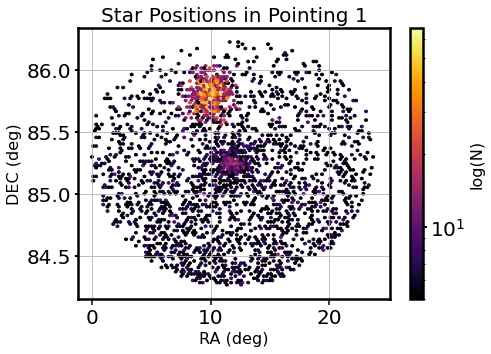

In [3]:
p.figure(figsize=(7,5))
PLT = p.hexbin(P1['ra'],P1['dec'],bins='log',mincnt=5,cmap='inferno') 
p.xlabel('RA (deg)')
p.ylabel('DEC (deg)')
p.colorbar(PLT,label='log(N)');
p.title('Star Positions in Pointing 1')
p.grid()


Q1: Are there any overdensities  in the field/pointing? If so, how many?

A1: Yes, there are 2 overdensities in the pointing

If there are any overdensities select them using the where function and print how many stars are in each.

In [4]:
indicies1_1 = np.where((P1['ra']>7.0)&(P1['ra']<13.0)&(P1['dec']<86.2)&(P1['dec']>85.5))
OD1_1 = P1[indicies1_1]
print('There are about %g stars in overdensity 1'%len(OD1_1['ra']))
indicies1_2 = np.where((P1['ra']>10.0)&(P1['ra']<15.0)&(P1['dec']<85.5)&(P1['dec']>85.0))
OD1_2 = P1[indicies1_2]
print('There are about %g stars in overdensity 2'%len(OD1_2['ra']))

There are about 6959 stars in overdensity 1
There are about 3022 stars in overdensity 2


## Finding Clusters in Pointing 1

We must now turn our attention to determining if any of the overdensities (if there were any) are actual clusters or not. 

We will start by looking at the PMRA/PMDEC space and the the parallax distribution of any overdensities that were found in the spatial plots above. 

Lets now plot the 2d distribution (hexbin) of  PMRA and PMDEC for any spatial overdensity regions seperatly (make sure to label the plot using plt.title('name of the plot'). I would HIGHLY reccomend using a mincount (mincnt) of 1 stars per bin, log bins, a gridsize (gridsize=150).  

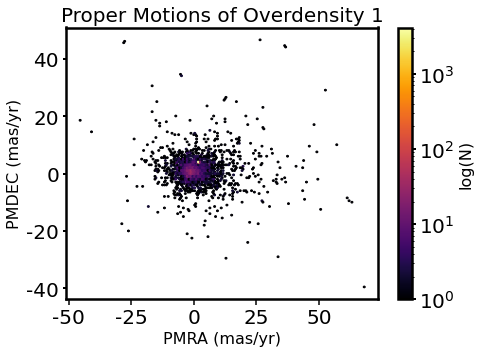

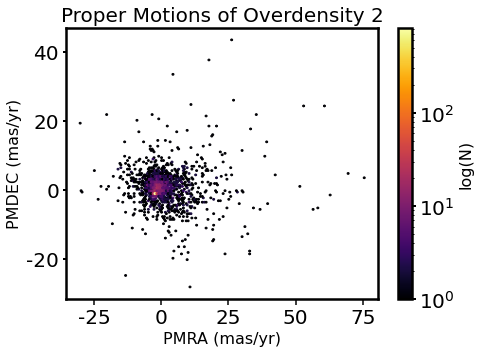

In [5]:
p.figure(figsize=(7,5))
PLT = p.hexbin(OD1_1['pmra'],OD1_1['pmdec'],gridsize=150,bins='log',mincnt=1,cmap='inferno')
p.xlabel('PMRA (mas/yr)')
p.ylabel('PMDEC (mas/yr)')
p.title('Proper Motions of Overdensity 1')
p.colorbar(PLT,label='log(N)');

p.figure(figsize=(7,5))
PLT = p.hexbin(OD1_2['pmra'],OD1_2['pmdec'],gridsize=150,bins='log',mincnt=1,cmap='inferno')
p.xlabel('PMRA (mas/yr)')
p.ylabel('PMDEC (mas/yr)')
p.title('Proper Motions of Overdensity 2')
p.colorbar(PLT,label='log(N)');

Q2: Are there any overdensities found in the PMRA/PMDEC plot of any of the spatially dense regions (in RA/DEC)? If so, what do these mean?

A2: Yes, I can see two very small bright yellow overdensities in each of the PMRA/PMDEC regions. This means that it is very likely that there is a cluster of stars in these regions, moving with very close PMRA/PMDEC values since they would be heavily bound by each others' gravity. 

For all spatial overdensitites identify the location of/select the proper motion overdensity (if any) using the where function. Make sure to be careful with indexing. 

In [6]:
in1_1 = np.where((OD1_1['pmra']<3.0)&(OD1_1['pmra']>1.0)&(OD1_1['pmdec']<5.0)&(OD1_1['pmdec']>3.0))
ODcluster1_1 = OD1_1[in1_1]
in1_2 = np.where((OD1_2['pmra']<-1.0)&(OD1_2['pmra']>-3)&(OD1_2['pmdec']<0)&(OD1_2['pmdec']>-2.0))
ODcluster1_2 = OD1_2[in1_2]

Now, plot the parallax distrubtion (on a single plot/figure) for each cluster candidate (i.e. any who cluster in all PMRA/PMDEC/RA/DEC)

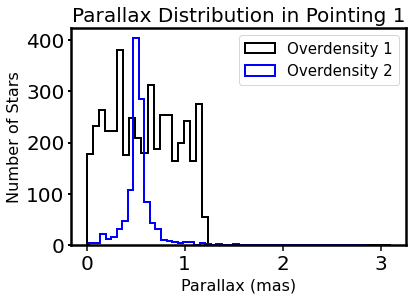

In [7]:
p.figure()
p.hist(ODcluster1_1['parallax'],histtype='step',lw=2,bins=50);
p.hist(ODcluster1_2['parallax'],histtype='step',lw=2,bins=50);
labels = ['Overdensity 1','Overdensity 2']
p.xlabel('Parallax (mas)')
p.ylabel('Number of Stars')
p.title('Parallax Distribution in Pointing 1')
p.legend(labels);

Q3 : How many real clusters are in Pointing 1? How do you know?

A3: I would say there's only 1 real cluster in Pointing 1, which is located in Overdensity 2. The parallax distribution for Overdensity 2 is a lot tighter and concentrated around a single parallax value of around 0.5 mas while Overdensity 1 has too much variation between parallax values.

For any real cluster, compute the median and standard deivation of the parallaxes

In [8]:
mParallax1 = np.median(ODcluster1_2['parallax'])
mStdev1 = np.std(ODcluster1_2['parallax'])
dist1 = 1000/ODcluster1_2['parallax']
meddist1 = np.median(dist1)
print('For the cluster, the median parallax is %g mas'%mParallax1)
print('For the cluster, the parallax standard deviation is %g mas'%mStdev1)
print('For the cluster, the median distance is %g pc'%meddist1)

For the cluster, the median parallax is 0.524742 mas
For the cluster, the parallax standard deviation is 0.179163 mas
For the cluster, the median distance is 1905.7 pc


Q4: What is the median distance to any clusters you found (ignore the effects of parallax uncertainties)?

A4: The median distance to the cluster I found is calculated to be 1905.7 parsecs.

## Plot the Color-Abs magnitude Diagram for Clusters in Pointing 1
Lets now plot the Color (bp-rp) - absolute magntiude (M_G) diagram for each cluster found in pointing 1. Lets make sure to plot them on the same diagram for comparision.  

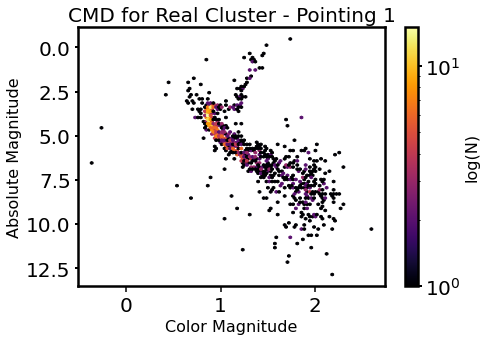

In [9]:
Gapp1 = ODcluster1_2['phot_g_mean_mag']
BP_RP1 = ODcluster1_2['bp_rp']
M_g1 = Gapp1-(5*np.log10(dist1))+5
p.figure(figsize=(7,5))
PLT=p.hexbin(BP_RP1,M_g1,bins='log',mincnt=1,cmap='inferno')
p.gca().invert_yaxis()
p.xlabel('Color Magnitude')
p.ylabel('Absolute Magnitude')
p.title('CMD for Real Cluster - Pointing 1')
p.colorbar(PLT,label='log(N)')
p.tight_layout()

## Load in Pointing 2
Lets now move to the second pointing 

Its easiest to begin by loading in the data and seeing whats there.

In [10]:
P2 = Table.read('./pointing2.fits')
P2.colnames

['source_id',
 'ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'ag_gspphot',
 'azero_gspphot',
 'bp_rp',
 'ebpminrp_gspphot',
 'radial_velocity',
 'radial_velocity_error']

You should get something like the following columns
'source_id' = source id of the star

 'source_id' = source id of the star
 
 'ra', = RA in deg 
 
 'dec', = declination in deg
 
 'parallax', = parallax in mas
 
 'pmra', = proper motion * cos(DEC) in the RA direction in mas/yr
 
 'pmdec', proper motion in declination in in mas/yr
 
 'phot_g_mean_mag', apparent G magnitude in mag
 
 'phot_bp_mean_mag',apparent BP magnitude in mag
 
 'phot_rp_mean_mag',apparent RP magnitude in mag
  
 'ag_gspphot', A_G (extinction in Gaia G) in mag
 
 'azero_gspphot', A0_G specific extinction in G at 550 nm 
 
 'bp_rp', BP-RP
 
 'ebpminrp_gspphot', E(BP-RP) reddening in mag
 
 'radial_velocity' = Radial Velocity in km/s
 
 'radial_velocity_error' = error Radial Velocity in km/s
 

## Plot the Equatorial positions for Pointing 2


Plot a 2-D histogram (hexbin) of the sky positions of the stars in pointing 2

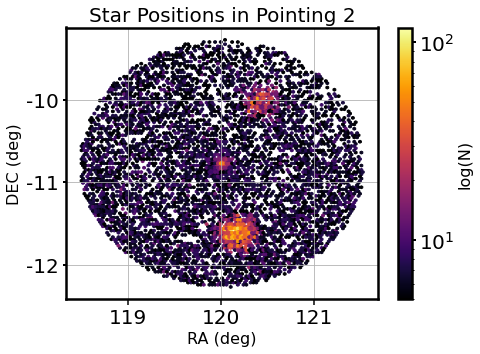

In [11]:
p.figure(figsize=(7,5))
PLT = p.hexbin(P2['ra'],P2['dec'],bins='log',mincnt=5,cmap='inferno')
p.xlabel('RA (deg)')
p.ylabel('DEC (deg)')
p.colorbar(PLT,label='log(N)');
p.title('Star Positions in Pointing 2')
p.grid()

Q5: Are there any overdensitites in the pointing 2? If so, how many?

A5: Yes, it looks like there are 3 overdensities in pointing 2.

If there are any overdensities select them using the where function and print how many stars are in each.

In [12]:
indicies2_1 = np.where((P2['ra']>120.25)&(P2['ra']<120.6)&(P2['dec']>-10.1)&(P2['dec']<-9.8))
OD2_1 = P2[indicies2_1]
print('There are about %g stars in overdensity 1'%len(OD2_1['ra']))
indicies2_2 = np.where((P2['ra']>119.9)&(P2['ra']<120.1)&(P2['dec']<-10.6)&(P2['dec']>-10.9))
OD2_2 = P2[indicies2_2]
print('There are about %g stars in overdensity 2'%len(OD2_2['ra']))
indicies2_3 = np.where((P2['ra']>120.0)&(P2['ra']<120.4)&(P2['dec']<-11.5)&(P2['dec']>-11.8))
OD2_3 = P2[indicies2_3]
print('There are about %g stars in overdensity 3'%len(OD2_3['ra']))

There are about 1847 stars in overdensity 1
There are about 969 stars in overdensity 2
There are about 4916 stars in overdensity 3


## Finding Clusters in Pointing 2

We must now turn our attention to determining if any of the overdensities (if there were any) are actual clusters or not. 

If there are any overdensities plot the parallax distrbtion of each overdensity on a single plot. The bins should use "Scott's" rule. 

Lets now plot the 2d distribution (hexbin) of  PMRA and PMDEC for any spatial overdensity regions seperatly (make sure to label the plot using plt.title('name of the plot'). I would HIGHLY reccomend using a mincount (mincnt) of 1 stars per bin, log bins, a gridsize (gridsize=50).  

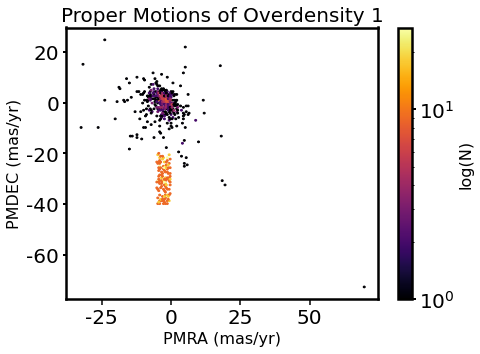

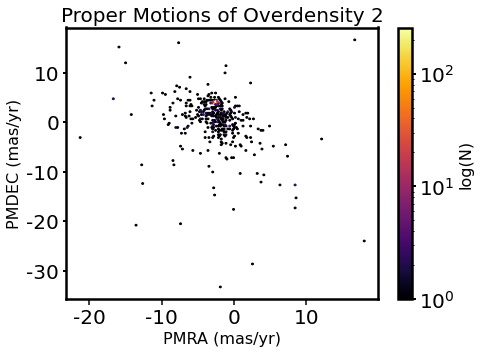

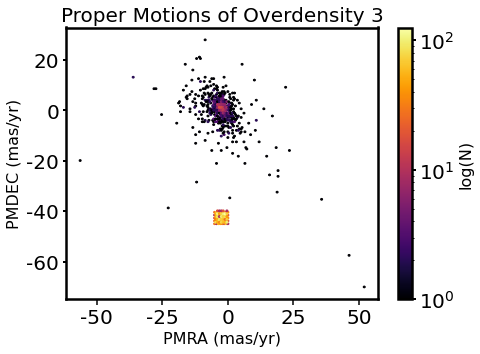

In [13]:
p.figure(figsize=(7,5))
PLT = p.hexbin(OD2_1['pmra'],OD2_1['pmdec'],gridsize=150,bins='log',mincnt=1,cmap='inferno')
p.xlabel('PMRA (mas/yr)')
p.ylabel('PMDEC (mas/yr)')
p.title('Proper Motions of Overdensity 1')
p.colorbar(PLT,label='log(N)');

p.figure(figsize=(7,5))
PLT = p.hexbin(OD2_2['pmra'],OD2_2['pmdec'],gridsize=150,bins='log',mincnt=1,cmap='inferno')
p.xlabel('PMRA (mas/yr)')
p.ylabel('PMDEC (mas/yr)')
p.title('Proper Motions of Overdensity 2')
p.colorbar(PLT,label='log(N)');

p.figure(figsize=(7,5))
PLT = p.hexbin(OD2_3['pmra'],OD2_3['pmdec'],gridsize=150,bins='log',mincnt=1,cmap='inferno')
p.xlabel('PMRA (mas/yr)')
p.ylabel('PMDEC (mas/yr)')
p.title('Proper Motions of Overdensity 3')
p.colorbar(PLT,label='log(N)');

Q6: Are there any *significant* (key word significant meaning well above the background) overdensities found in the PMRA/PMDEC plot(s) of any of the spatially dense regions (in RA/DEC)? If so, what do these mean?

A6: Yes, there seem to be significant overdensities in 3 PMRA/PMDEC plots. In overdensity 1 and 3, the clusters are really large looking, while in overdensity 2 it is just a tiny spot, similar to those in pointing 1. Especially in overdensity 1 and 3, for all graphs it seems these stars have some sort of coordinated groupings or possible clusters due to how dense the graphs look. It probably means that there are clusters in all of these overdensities, but more analysis is needed to know if they're real or not.

For all (signficant) spatial overdensitites identify the location of the proper motion overdensity (if any) using the where function. Be very careful about your indexing.

In [14]:
in2_1 = np.where((OD2_1['pmra']<5.0)&(OD2_1['pmra']>-6.0)&(OD2_1['pmdec']<-15.0)&(OD2_1['pmdec']>-45.0))
ODcluster2_1 = OD2_1[in2_1]
in2_2 = np.where((OD2_2['pmra']<-2.0)&(OD2_2['pmra']>-3.0)&(OD2_2['pmdec']<4.5)&(OD2_2['pmdec']>3.5))
ODcluster2_2 = OD2_2[in2_2]
in2_3 = np.where((OD2_3['pmra']<5.0)&(OD2_3['pmra']>-5.0)&(OD2_3['pmdec']<-35.0)&(OD2_3['pmdec']>-50.0))
ODcluster2_3 = OD2_3[in2_3]

Plot the parallax distrubtion (on a single plot/figure) for each cluster candidate

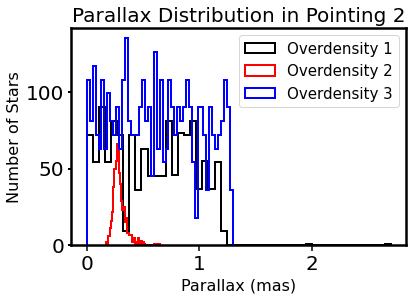

In [15]:
p.figure()
p.hist(ODcluster2_1['parallax'],histtype='step',color='k',lw=2,bins=50);
p.hist(ODcluster2_2['parallax'],histtype='step',color='r',lw=2,bins=50);
p.hist(ODcluster2_3['parallax'],histtype='step',color='b',lw=2,bins=50);
labels = ['Overdensity 1','Overdensity 2','Overdensity 3']
p.xlabel('Parallax (mas)')
p.ylabel('Number of Stars')
p.title('Parallax Distribution in Pointing 2')
p.legend(labels);

Q7 : How many real clusters are in Pointing 2? How do you know?

A7: There is 1 real cluster in overdensity 2 of Pointing 2. Despite there being less stars, the parallax distribution is much tighter and centered around a single parallax vlaue, while the other overdensities don't have any clear peak. 

For any real cluster, compute the median and standard deivation of the parallaxes

In [16]:
mParallax2 = np.median(ODcluster2_2['parallax'])
mStdev2 = np.std(ODcluster2_2['parallax'])
dist2 = 1000/ODcluster2_2['parallax']
meddist2 = np.median(dist2)
print('For OD2 the median parallax is %g mas'%mParallax2)
print('For OD2 the parallax standard deviation is %g mas'%mStdev2)
print('For the cluster, the median distance is %g pc'%meddist2)

For OD2 the median parallax is 0.282433 mas
For OD2 the parallax standard deviation is 0.0604002 mas
For the cluster, the median distance is 3540.66 pc


Q8: What is the median distance to any clusters you found in pointing 2 (ignore the effects of parallax uncertainties)?

A8: The median distance for the cluster is 3540.66 parsecs

## Plot the Color-Abs magnitude Diagram for Clusters in Pointing 1 and Pointing 2
Lets now plot the combined Color absolute magntiude diagram for each cluster found in pointing 1 and 2. Lets make sure to plot them on the same diagram for comparision. 

Below plot the color-abs. magnitude diagram (bp-rp) vs M_G for all "true" clusters

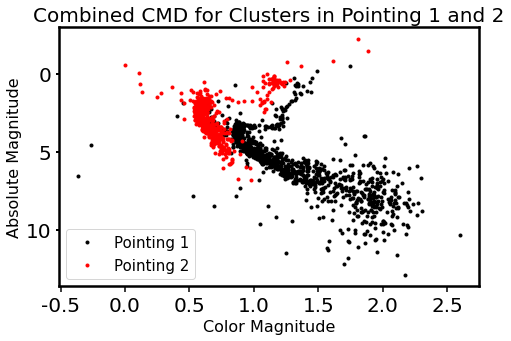

In [17]:
Gapp2 = ODcluster2_2['phot_g_mean_mag']
BP_RP2 = ODcluster2_2['bp_rp']
M_g2 = Gapp2-(5*np.log10(dist2))+5

p.figure(figsize=(7,5))
p.plot(BP_RP1,M_g1,'k.')
p.plot(BP_RP2,M_g2,'r.')
labels = ['Pointing 1','Pointing 2']
p.gca().invert_yaxis()
p.xlabel('Color Magnitude')
p.ylabel('Absolute Magnitude')
p.title('Combined CMD for Clusters in Pointing 1 and 2')
p.legend(labels)
p.tight_layout()